# Instacart Customer Purchase Analysis

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd 

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
products = pd.read_csv('/datasets/products.csv', sep=";")
aisles = pd.read_csv('/datasets/aisles.csv', sep=";")
departments = pd.read_csv('/datasets/departments.csv', sep=";")
order_products = pd.read_csv('/datasets/order_products.csv', sep=";")

In [3]:
# mostrar información del DataFrame
instacart_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
duplicates = instacart_orders.duplicated()
print(f"Pedidos duplicados: {duplicates.sum()}")

Pedidos duplicados: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Despues de la validadcion vi que hay duplicados en todas las columnas, adicional a ellos hay valores ausentes tambien.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
miercoles_2am_instacart_orders = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
print(f"Pedidos realizados el miércoles a las 2:00 a.m.: {miercoles_2am_instacart_orders.shape[0]}")

Pedidos realizados el miércoles a las 2:00 a.m.: 121


¿Qué sugiere este resultado?

Este resultado sugiere que al ser un hora atipica para comprar los pedidos se perciben como relativamenre bajos, y que hay mu pocos clientes para estas horas nocturnas que pueden ser que trabajen a dichas horas por ende prefieren realizar los pedidos en la madrugada.

In [10]:
# Elimina los pedidos duplicados
orders_no_duplicates = instacart_orders.drop_duplicates()
print(f"Pedidos después de eliminar duplicados: {orders_no_duplicates.shape[0]}")

Pedidos después de eliminar duplicados: 478952


In [11]:
# Vuelve a verificar si hay filas duplicadas
duplicates_after_removal = orders_no_duplicates.duplicated()
print(f"Pedidos duplicados después de la eliminación: {duplicates_after_removal.sum()}")

Pedidos duplicados después de la eliminación: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicate_order_ids = orders_no_duplicates[orders_no_duplicates.duplicated(subset='order_id')]
print(f"Pedidos con IDs duplicados después de la eliminación: {duplicate_order_ids.shape[0]}")

Pedidos con IDs duplicados después de la eliminación: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Descubri que habian pocos pedidos duplicados, pero que era necesario depurar o de limpiar para poder evitar problemas con el inventario, y una vez ya removidos se doble valido filas y IDs para cerciorarse de que realmente estuviese limpia la data. 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
total_duplicates_in_products = products.duplicated()
print(f"Filas totalmente duplicadas: {total_duplicates_in_products.sum()}")

Filas totalmente duplicadas: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicados_department_id = products[products.duplicated(subset=["department_id"])]
print(f"IDs de departamentos duplicados: {duplicados_department_id.sum()}")

IDs de departamentos duplicados: product_id       1234770633
aisle_id            3366384
department_id        582604
dtype: int64


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
nombres_de_duplicados_de_products = products.duplicated(subset='product_name')
print(f"Nombres duplicados de productos: {nombres_de_duplicados_de_products.sum()}")

Nombres duplicados de productos: 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
nombres_de_productos_no_faltantes= products[products['product_name'].notnull()]
nombres_de_productos_no_faltantes = nombres_de_productos_no_faltantes.duplicated(subset='product_name')
print(f"Nombres duplicados de productos no faltantes: {nombres_de_productos_no_faltantes.sum()}")

Nombres duplicados de productos no faltantes: 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este data frame de products validamos si habían filas duplicadas las cuales no hubieron, pero hallamos IDs de departamentos duplicados así como nombres duplicados de productos y nombres duplicados de productos no faltantes.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
total_duplicates_in_departments = departments.duplicated()
print(f"Filas totalmente duplicadas: {total_duplicates_in_departments.sum()}")

Filas totalmente duplicadas: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicates_department_ids = departments.duplicated(subset='department_id')
print(f"IDs de departamentos duplicados: {duplicates_department_ids.sum()}")

IDs de departamentos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este data frame de departments validamos si habían filas duplicadas las cuales no hubieron ni IDs duplicados, por ende la data esta limpia.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
total_aisles_duplicates= aisles.duplicated()
print(f"Filas totalmente duplicadas: {total_aisles_duplicates.sum()}")

Filas totalmente duplicadas: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicates_aisles_ids = aisles.duplicated(subset='aisle_id')
print(f"IDs de departamentos duplicados: {duplicates_aisles_ids.sum()}")

IDs de departamentos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este data frame de aisles validamos si habían filas duplicadas las cuales no hubieron ni IDs de pasillos duplicados, por ende la data esta limpia.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
total_order_products_duplicates= order_products.duplicated()
print(f"Filas totalmente duplicadas: {total_order_products_duplicates.sum()}")

Filas totalmente duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
potecialmente_duplicates = order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])
print(f"Duplicados engañosos en 'order_products': {potecialmente_duplicates.sum()}")

Duplicados engañosos en 'order_products': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este data frame de order_products validamos si habían filas duplicadas las cuales no hubieron y re validamos cuidadosamente para que no hubiese por ahi un duplicado engañoso.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = products[products['product_name'].isnull()]
print(f"Valores ausentes en la columna 'product_name': {missing_product_names.sum()}")

Valores ausentes en la columna 'product_name': product_id       31706543
product_name            0
aisle_id           125800
department_id       26418
dtype: object


Describe brevemente cuáles son tus hallazgos.

No se encontraron valores ausentes en la columna product_name.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
ausentes_product_name = products[products['product_name'].isnull()]

count_aisle_100 = missing_product_names[missing_product_names['aisle_id'] == 100].shape[0]
print(f"Cantidad de productos ausentes relacionados con 'aisle_id' 100: {count_aisle_100}")

Cantidad de productos ausentes relacionados con 'aisle_id' 100: 1258


Describe brevemente cuáles son tus hallazgos.

Por este lado se encontro la cantidad de 1258 productos ausentes en 'aisle_id' 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

count_department_21 = missing_product_names[missing_product_names['department_id'] == 21].shape[0]
print(f"Cantidad de productos ausentes relacionados con 'department_id' 21: {count_department_21}")

Cantidad de productos ausentes relacionados con 'department_id' 21: 1258


Describe brevemente cuáles son tus hallazgos.

En 'department_id' 21 encontramos productos ausentes con la cantidad de 1258.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles[aisles['aisle_id'] == 100]
department_21 = departments[departments['department_id'] == 21]
print(f"Datos del pasillo con ID 100:\n{aisle_100}")
print(f"Datos del departamento con ID 21:\n{department_21}")

Datos del pasillo con ID 100:
    aisle_id    aisle
99       100  missing
Datos del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

Desde mi perspectiva veo que la tabla aisles el pasillos con con aisle_id 100 tiene el valor de "missing" lo que me da entender que no hay informacion sobre de dicho pasillo, y lo mismo para la tabla deparments para deparment_id 21.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(f"Valores ausentes en la columna 'product_name' después de completar: {products['product_name'].isnull().sum()}")

Valores ausentes en la columna 'product_name' después de completar: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En esta seccion realizamos los cambios sugeridos de cambiar los valores ausentes por 'Unknown', y validamos que no hubieran mas valores ausentes.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
valores_ausentes_en_instacart_orders = instacart_orders.isnull().sum()
print(f"Valores ausentes por columna:\n{valores_ausentes_en_instacart_orders}")

Valores ausentes por columna:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
no_first_orders = instacart_orders[instacart_orders['order_number'] != 1]
missing_no_first_orders = no_first_orders[no_first_orders['days_since_prior_order'].isnull()]

if missing_no_first_orders.shape[0] > 0:
    print("Hay valores ausentes en 'days_since_prior_order' que no son el primer pedido del cliente.")
else:
    print("No hay valores ausentes en 'days_since_prior_order' que no sean el primer pedido del cliente.")

No hay valores ausentes en 'days_since_prior_order' que no sean el primer pedido del cliente.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Validamos valores ausentes en el data frame 'orders' en la cual no encontramos ninguno y no hay valores aunsentes que no sean desde el primer pedido.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
valores_ausentes_en_order_products = order_products.isnull().sum()
print(f"Valores ausentes por columna:\n{valores_ausentes_en_order_products}")

Valores ausentes por columna:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"Valor mínimo en 'add_to_cart_order': {min_value}")
print(f"Valor máximo en 'add_to_cart_order': {max_value}")

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.

Se encontro valores ausentes en 'add_to_cart_order', posteriormente se valido los valores minimos y maximos la cual nos dio un resultado de 1 para minimo y 64 para maximo.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart_order_ids = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(f"IDs de pedidos con valores ausentes en 'add_to_cart_order': {missing_add_to_cart_order_ids}")

IDs de pedidos con valores ausentes en 'add_to_cart_order': [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
orders_with_missing_add_to_cart = order_products[order_products['order_id'].isin(missing_add_to_cart_order_ids)]
orders_with_more_than_64_products = orders_with_missing_add_to_cart.groupby('order_id').size() > 64
print(f"Todos los pedidos con valores ausentes tienen más de 64 productos: {orders_with_more_than_64_products.all()}")

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
grouped_orders_with_missing = orders_with_missing_add_to_cart.groupby('order_id').size()

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_products_in_missing_orders = grouped_orders_with_missing.min()
print(f"Valor mínimo del conteo de 'product_id' en pedidos con datos ausentes: {min_products_in_missing_orders}")

Todos los pedidos con valores ausentes tienen más de 64 productos: True
Valor mínimo del conteo de 'product_id' en pedidos con datos ausentes: 65


Describe brevemente cuáles son tus hallazgos.

Se encontro que todos los pedidos que cuentan con valores ausentes tiene mas de 64 productos y el conteo de 'product_id' en pedidos con datos ausentes fue de 65.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(f"Valores ausentes en 'add_to_cart_order' después de reemplazar: {order_products['add_to_cart_order'].isnull().sum()}")

Valores ausentes en 'add_to_cart_order' después de reemplazar: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ya posterior a realizar los cambios solicitados en la columna 'add_to_cart' no hubo valores ausentes.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
import matplotlib.pyplot as plt


invalid_order_hours = instacart_orders[(instacart_orders['order_hour_of_day'] < 0) | (instacart_orders['order_hour_of_day'] > 23)]
print(f"Valores inválidos en 'order_hour_of_day': {invalid_order_hours.shape[0]}")

if invalid_order_hours.shape[0] > 0:
    print(f"Filas con valores inválidos en 'order_hour_of_day':\n{invalid_order_hours}")


invalid_order_days = instacart_orders[(instacart_orders['order_dow'] < 0) | (instacart_orders['order_dow'] > 6)]
print(f"Valores inválidos en 'order_dow': {invalid_order_days.shape[0]}")
if invalid_order_days.shape[0] > 0:
    print(f"Filas con valores inválidos en 'order_dow':\n{invalid_order_days}")


Valores inválidos en 'order_hour_of_day': 0
Valores inválidos en 'order_dow': 0


Escribe aquí tus conclusiones

Despues de realizar la verificacion solicitada no se encontraron valores invalidos para 'order_hour_of_day' como 'order_dow'.


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

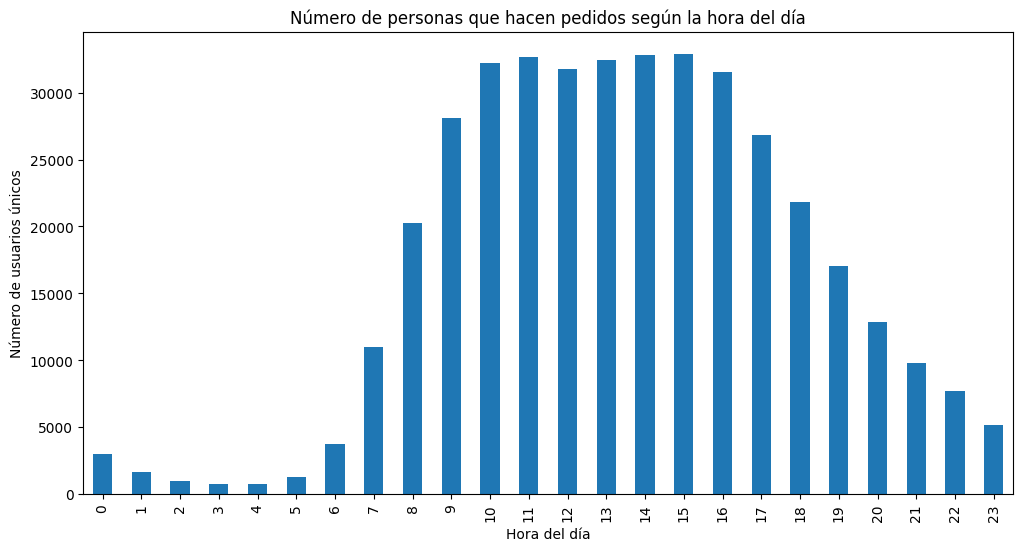

In [36]:
users_per_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()

plt.figure(figsize=(12, 6))
users_per_hour.plot(kind='bar')


plt.xlabel('Hora del día')
plt.ylabel('Número de usuarios únicos')
plt.title('Número de personas que hacen pedidos según la hora del día')

plt.show()

Escribe aquí tus conclusiones

Según la grafica arriba en las horas 0 hay 2500 personas realizando pedidos, entre las horas 1 y 5 hay un promedio de 1000 personas, entre las horas 6 y 10 van subiendo de 5000 por cada hora las personas que hacen pedidos yendo de 5000 hasta alcanzar 30000 personas, ya después entre las horas 11 y 14 se mantiene una cantidad de personas de 32500,y ya posteriormente entre las horas 15 y 23 comienza a caer las cantidad de personas que realizan compras que va entre 30000 bajando cada hora 5000 personas y quedándose en la hora 23 con 2500 personas.

### [A3] ¿Qué día de la semana compran víveres las personas?

Segun la tendencia las personas compran mas los viveres en domingo y lunes.


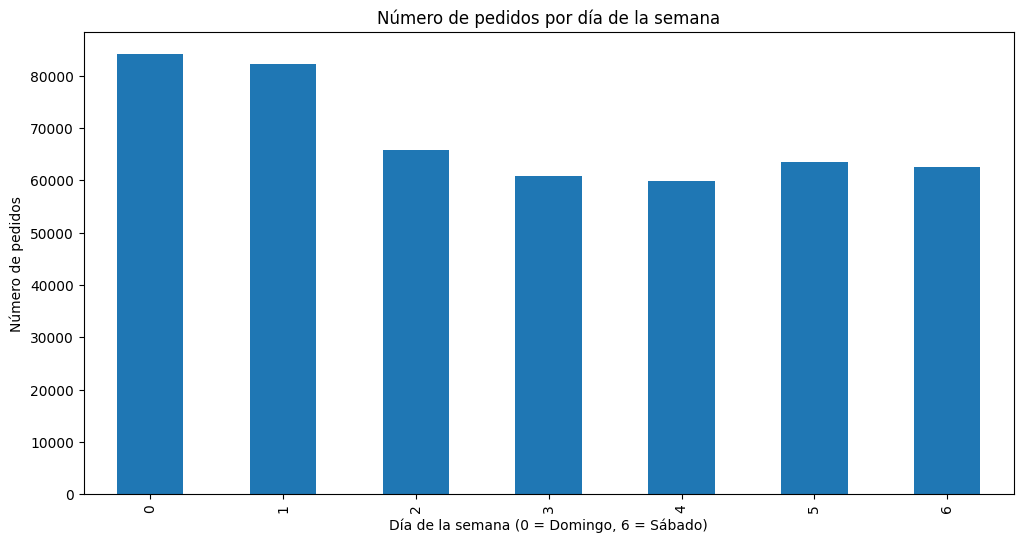

In [37]:
print(f"Segun la tendencia las personas compran mas los viveres en domingo y lunes.")
plt.figure(figsize=(12, 6))
instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Día de la semana (0 = Domingo, 6 = Sábado)')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por día de la semana')
plt.show()

Escribe aquí tus conclusiones

Según la tendencia, las personas compran más víveres los domingos y lunes, con los mayores números de aproximadamente 80,000 pedidos en estos dos días; posteriormente, en el resto de la semana, desde el martes hasta el sábado, los pedidos se mantienen constantes en alrededor de 60,000 por día.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Podemos decir que las personas tardan en promedio de 8 a 30 dias para realizar otro pedido.


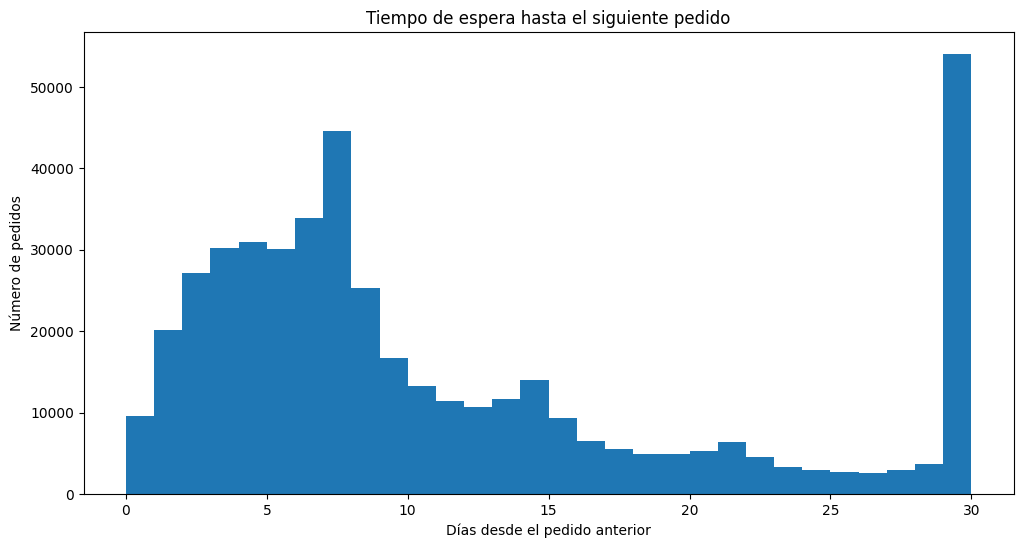

Valor mínimo de 'days_since_prior_order': 0.0
Valor máximo de 'days_since_prior_order': 30.0


In [38]:
print(f"Podemos decir que las personas tardan en promedio de 8 a 30 dias para realizar otro pedido.")
plt.figure(figsize=(12, 6))
instacart_orders['days_since_prior_order'].dropna().plot(kind='hist', bins=30)
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.title('Tiempo de espera hasta el siguiente pedido')
plt.show()

min_days_since_prior_order = instacart_orders['days_since_prior_order'].min()
max_days_since_prior_order = instacart_orders['days_since_prior_order'].max()
print(f"Valor mínimo de 'days_since_prior_order': {min_days_since_prior_order}")
print(f"Valor máximo de 'days_since_prior_order': {max_days_since_prior_order}")

Escribe aquí tus conclusiones

Podemos decir que las personas están constantemente realizando pedidos a durante todo el mes pero si hay una alza en el día 8 como en el día 30, ahora bien la grafica nos muestra que los pedidos son contantes al inicio del mes y posteriormente decae, lo que me deja con una suposición u hipótesis de que la personas se realizan mas al principio de mes así como el día final por el pago de sus empleadores realizan cada quincena, pero como te comente es solo una teoria de la caul podria haber diferente variables del tiempo que toma para que cada persona vuelva a realizar otro pedido, por lo que le dejaria esta tarea a la area administrativa para que realicen un estudio del mismo e incentiven las ventas de los pedidos.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

En conclusion entre las 0-5 horas el sabado tiene ligeramente mas ventas, entre las 10-15 horas los sabados siguen teniendo un poco mas de ventas y entre 16-20 horas los sabados siguen tienen ligeramente mas ventas pero vandisminuyendo e ambos dias.


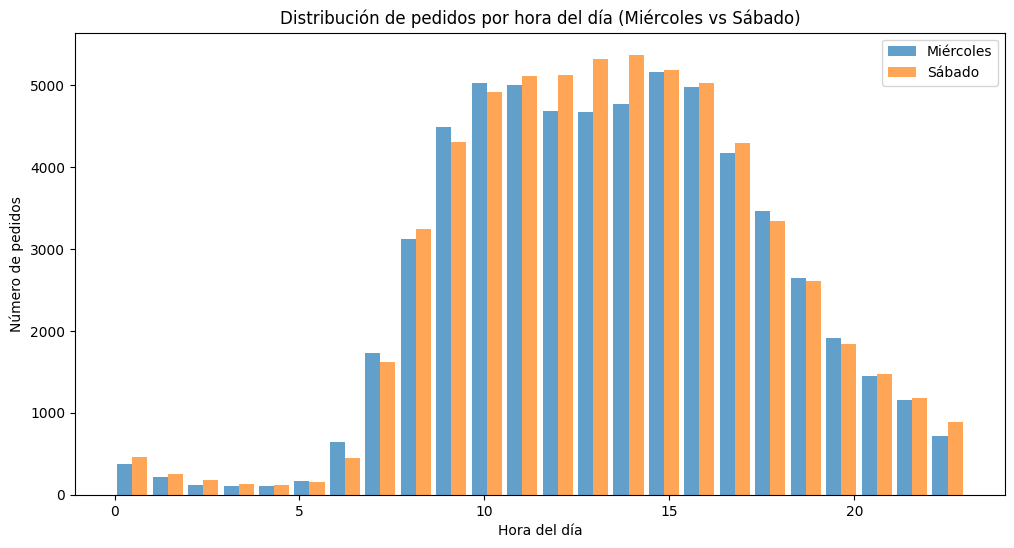

In [39]:
miercoles_orders = instacart_orders[instacart_orders['order_dow'] == 3]
sabados_orders = instacart_orders[instacart_orders['order_dow'] == 6]

plt.figure(figsize=(12, 6))
plt.hist([miercoles_orders['order_hour_of_day'], sabados_orders['order_hour_of_day']],
         bins=24, label=['Miércoles', 'Sábado'], alpha=0.7, rwidth=0.85)
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.legend(loc='upper right')

print(f"En conclusion entre las 0-5 horas el sabado tiene ligeramente mas ventas, entre las 10-15 horas los sabados siguen teniendo un poco mas de ventas y entre 16-20 horas los sabados siguen tienen ligeramente mas ventas pero vandisminuyendo e ambos dias.")

Escribe aquí tus conclusiones

En conclusión entre las 0-5 horas el sábado tiene ligeramente mas ventas, entre las 10-15 horas los sábados siguen teniendo un poco mas de ventas y entre 16-20 horas los sábados siguen tienen ligeramente mas ventas; en resumen tanto en la madrugada y noche los sábados tienen una tendencia a tener mas pedidos, mientras que para el día miércoles en la mañana hay un aumento y tarde comienza a demostrar una disminución rápida.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

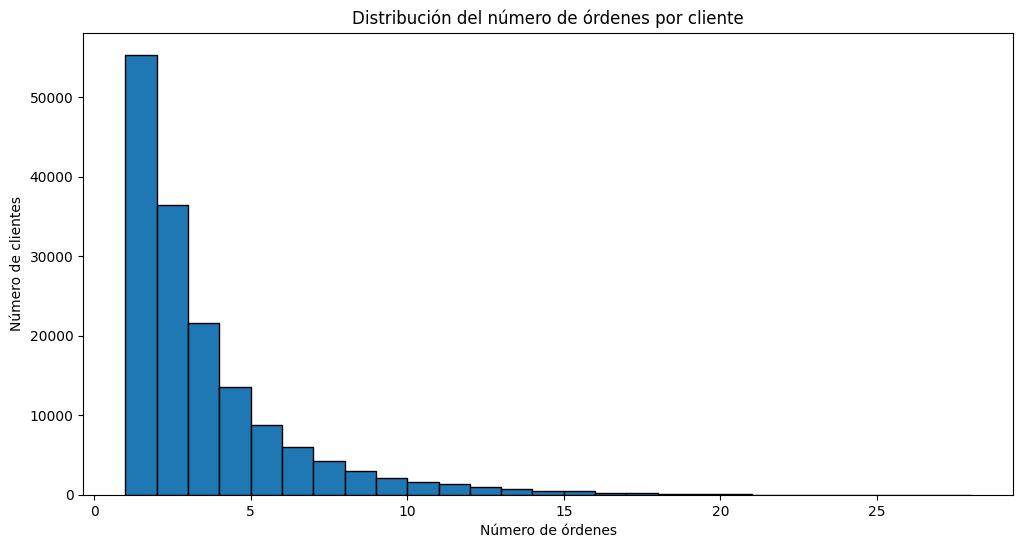

1     55355
2     36508
3     21548
4     13498
5      8778
6      6012
7      4240
8      3016
9      2153
10     1646
11     1308
12      948
13      701
14      514
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: user_id, dtype: int64


In [40]:
order_counts = instacart_orders['user_id'].value_counts()


plt.figure(figsize=(12, 6))
order_counts.plot(kind='hist', bins=range(1, order_counts.max() + 1), edgecolor='black')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de órdenes por cliente')
plt.show()

tabla_de_distrubucion = order_counts.value_counts().sort_index()
print(tabla_de_distrubucion)

Escribe aquí tus conclusiones

En conclusion, la mayoría de los clientes han realizado entre 1 y 5 pedidos, con un número decreciente de clientes a medida que aumenta el número de pedidos realizados.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES



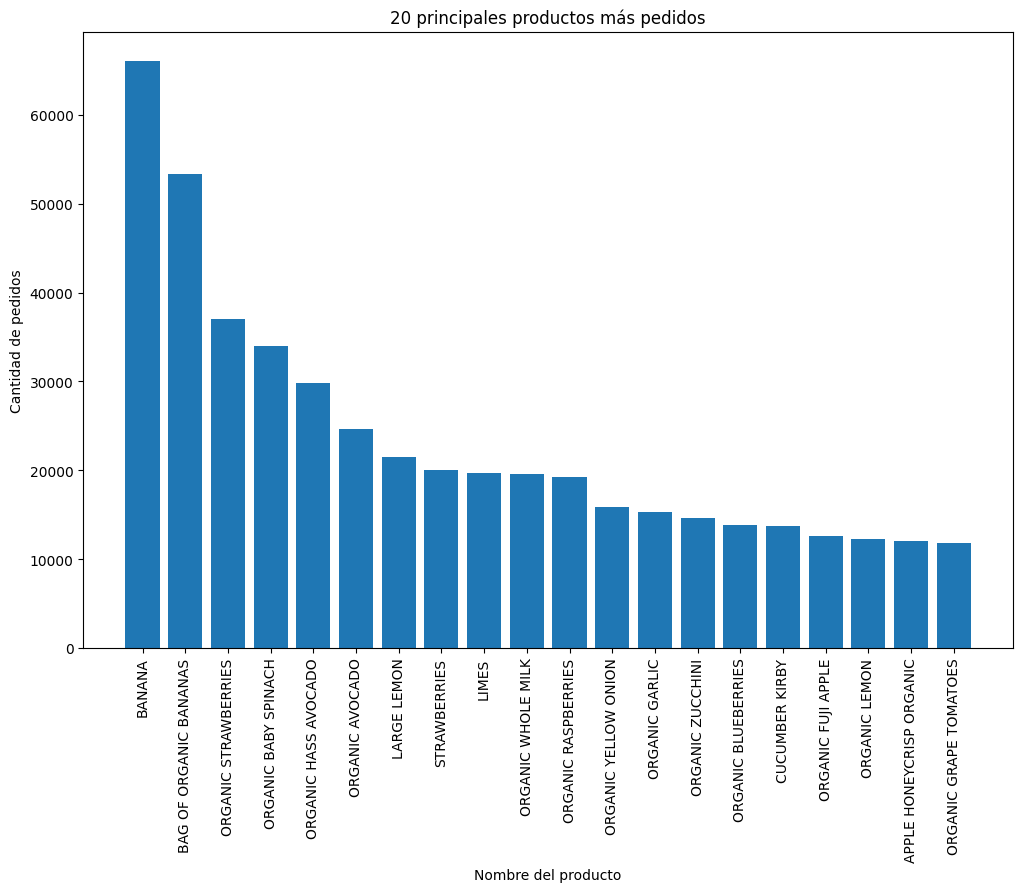

In [41]:
top_products = order_products['product_id'].value_counts().head(20)

top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'count']

top_products_df = top_products_df.merge(products[['product_id', 'product_name']],
                                        on='product_id',
                                        how='left')
print(top_products_df[['product_id', 'product_name']])

print()

plt.figure(figsize=(12, 8))
plt.bar(top_products_df['product_name'], top_products_df['count'])
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de pedidos')
plt.title('20 principales productos más pedidos')
plt.xticks(rotation=90)
plt.show()

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Se realizaron un total de 450046, en promedio las persoanas compran 10 articulos por perdido, el 25% de los pedidos contienen 5 o menos productos,la mediana es de 8 lo que nos indica que el 50% de los pedidos tienen 8 o menos producto, el 75% de los pedidos contienen 14 o menos productos, y por ultimo el pedido con mayor cantidad de productos tiene 127.


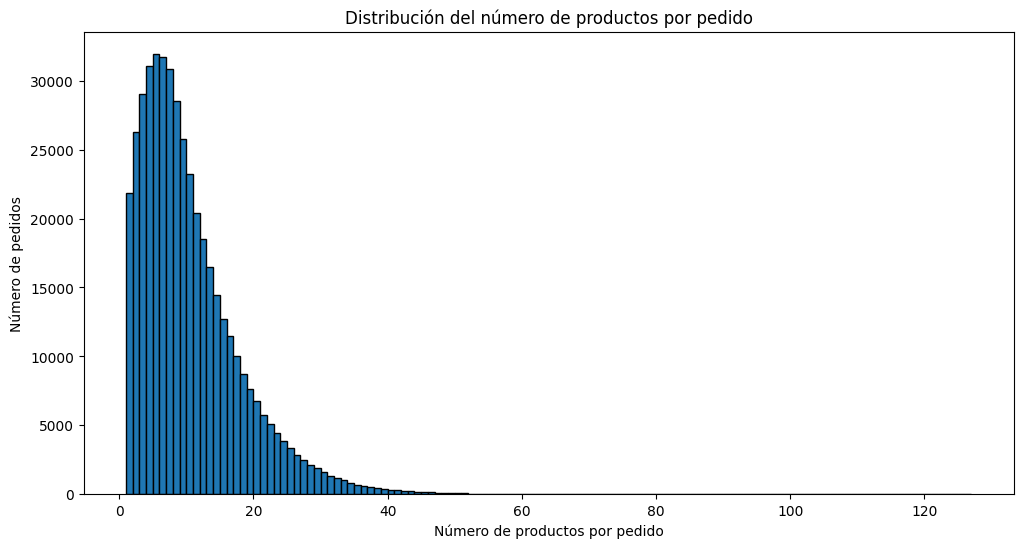

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64



In [42]:
print(f"Se realizaron un total de {450046}, en promedio las persoanas compran {10} articulos por perdido, el {25}% de los pedidos contienen {5} o menos productos,la mediana es de {8} lo que nos indica que el {50}% de los pedidos tienen {8} o menos producto, el {75}% de los pedidos contienen 14 o menos productos, y por ultimo el pedido con mayor cantidad de productos tiene 127.")
products_per_order = order_products['order_id'].value_counts()


plt.figure(figsize=(12, 6))
products_per_order.plot(kind='hist', bins=range(1, products_per_order.max() + 1), edgecolor='black')
plt.xlabel('Número de productos por pedido')
plt.ylabel('Número de pedidos')
plt.title('Distribución del número de productos por pedido')
plt.show()


products_per_order_stats = products_per_order.describe()
print(products_per_order_stats)
print()

Escribe aquí tus conclusiones

En conclusion, se realizaron un total de 450046, en promedio las persoanas compran 10 articulos por perdido, el 25% de los pedidos contienen 5 o menos productos,la mediana es de 8 lo que nos indica que el 50% de los pedidos tienen 8 o menos producto, el 75% de los pedidos contienen 14 o menos productos, y por ultimo el pedido con mayor cantidad de productos tiene 127.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF



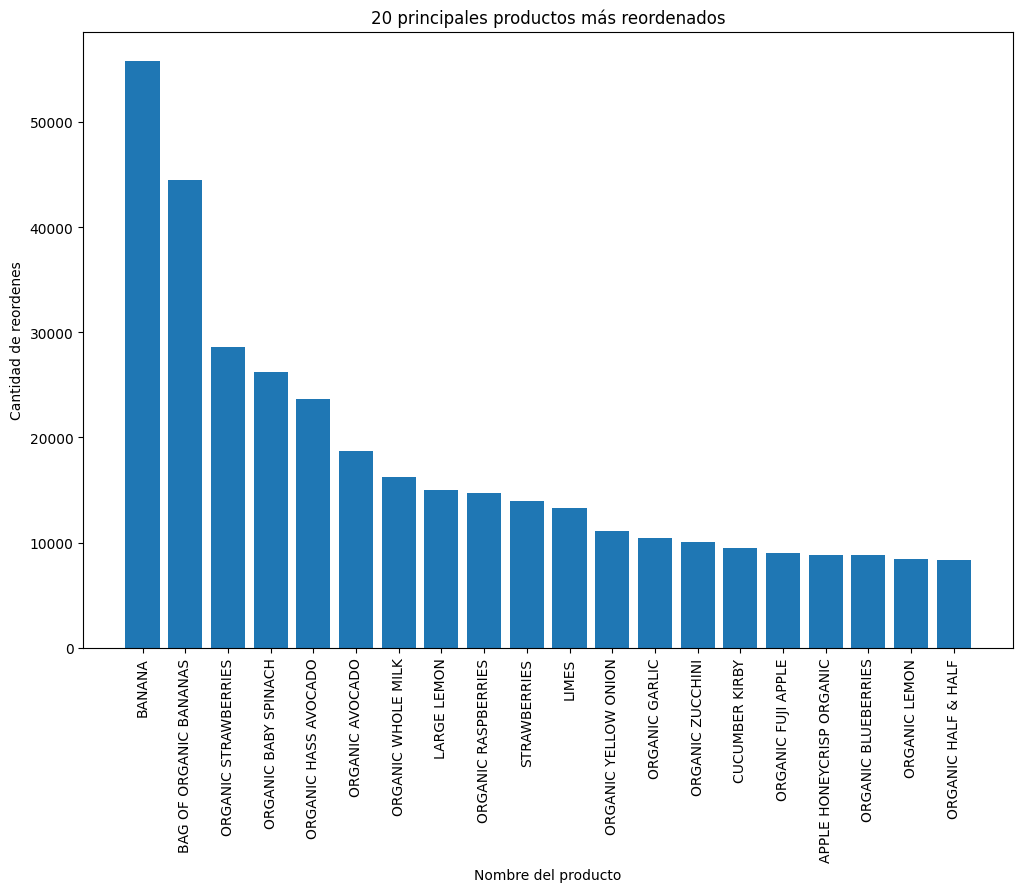

In [43]:
reordered_products = order_products[order_products['reordered'] == 1]


top_reordered_products = reordered_products['product_id'].value_counts().head(20)


top_reordered_df = top_reordered_products.reset_index()
top_reordered_df.columns = ['product_id', 'count']


top_reordered_df = top_reordered_df.merge(products[['product_id', 'product_name']],
                                          on='product_id',
                                          how='left')


print(top_reordered_df[['product_id', 'product_name']])

print()
plt.figure(figsize=(12, 8))
plt.bar(top_reordered_df['product_name'], top_reordered_df['count'])
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de reordenes')
plt.title('20 principales productos más reordenados')
plt.xticks(rotation=90)
plt.show()

Escribe aquí tus conclusiones

Los clientes muestras una gran preferencia por los productos organicos y frescos, ya que son productos de uso basicos que se utilizan en las cocinas regularmente, dichos productos en su mayoria son las frutas y verduras.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [44]:
total_orders_per_product = order_products['product_id'].value_counts()


reorders_per_product = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

proportion_de_order_products = pd.DataFrame({
    'total_orders': total_orders_per_product,
    'reorders': reorders_per_product
})

proportion_de_order_products['reorders'] = proportion_de_order_products['reorders'].fillna(0)

proportion_de_order_products['reorder_proportion'] = proportion_de_order_products['reorders'] / proportion_de_order_products['total_orders']

proportion_de_order_products = proportion_de_order_products.reset_index().merge(products[['product_id', 'product_name']],
                                                  left_on='index', right_on='product_id',
                                                  how='left')

mean_total_de_las_orders = proportion_de_order_products['total_orders'].mean()
mean_de_las_reorders = proportion_de_order_products['reorders'].mean()

print(proportion_de_order_products[['product_id', 'product_name', 'total_orders', 'reorders', 'reorder_proportion']])
print(f"Promedio total de órdenes: {mean_total_de_las_orders}")
print(f"Promedio total de reordenes: {mean_de_las_reorders}")

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               7                     PURE COCONUT WATER WITH ORANGE   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       total_orders  reorders  reorder_proportion  
0               280     158.0            0.564286  
1                11       0.0  

Escribe aquí tus conclusiones

Basandonos en los resultados las porciones que se pide y ques e vuelven a pedir son bastantes bajas y ocilan entre 0 y 1, sin embargo podemos decir que el promedio total de reordenes es de un 58.90%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [45]:
merged_df = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id', how='left')

total_products_por_usuario = merged_df['user_id'].value_counts()

reordered_products_por_usuario = merged_df[merged_df['reordered'] == 1]['user_id'].value_counts()

proportion_por_usuario= pd.DataFrame({
    'total_products': total_products_por_usuario,
    'reordered_products': reordered_products_por_usuario
})

proportion_por_usuario['reordered_products'] = proportion_por_usuario['reordered_products'].fillna(0)

proportion_por_usuario['reorder_proportion'] = proportion_por_usuario['reordered_products'] / proportion_por_usuario['total_products']

mean_total_de_los_products = proportion_por_usuario['total_products'].mean()
mean_reordered_de_los_products = proportion_por_usuario['reordered_products'].mean()

print(proportion_por_usuario)
print(f"Promedio total de productos por usuario: {mean_total_de_los_products}")
print(f"Promedio total de productos reordenados por usuario: {mean_reordered_de_los_products}")

        total_products  reordered_products  reorder_proportion
2                   26                 1.0            0.038462
4                    2                 0.0            0.000000
5                   12                 8.0            0.666667
6                    4                 0.0            0.000000
7                   14                13.0            0.928571
...                ...                 ...                 ...
206203              27                 6.0            0.222222
206206              21                15.0            0.714286
206207              46                41.0            0.891304
206208             125                87.0            0.696000
206209              25                 8.0            0.320000

[149626 rows x 3 columns]
Promedio total de productos por usuario: 30.3767593867376
Promedio total de productos reordenados por usuario: 17.937450710438025


Escribe aquí tus conclusiones

En esta seccion se vuelve a repetir el patron donde las porciones son muy pequeñas que van entre 0 y 1 pero el promedio toatl de los productos reordenados por los clientes es de 17.93%.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

    product_id                 product_name
0        24852                       BANANA
1        13176       BAG OF ORGANIC BANANAS
2        27845           ORGANIC WHOLE MILK
3        21137         ORGANIC STRAWBERRIES
4        47209         ORGANIC HASS AVOCADO
5        21903         ORGANIC BABY SPINACH
6        47766              ORGANIC AVOCADO
7        19660                 SPRING WATER
8        16797                 STRAWBERRIES
9        27966          ORGANIC RASPBERRIES
10       44632   SPARKLING WATER GRAPEFRUIT
11       49235          ORGANIC HALF & HALF
12       47626                  LARGE LEMON
13         196                         SODA
14       38689     ORGANIC REDUCED FAT MILK
15       26209                        LIMES
16       12341                HASS AVOCADOS
17        5785  ORGANIC REDUCED FAT 2% MILK
18       27086                  HALF & HALF
19       22935         ORGANIC YELLOW ONION



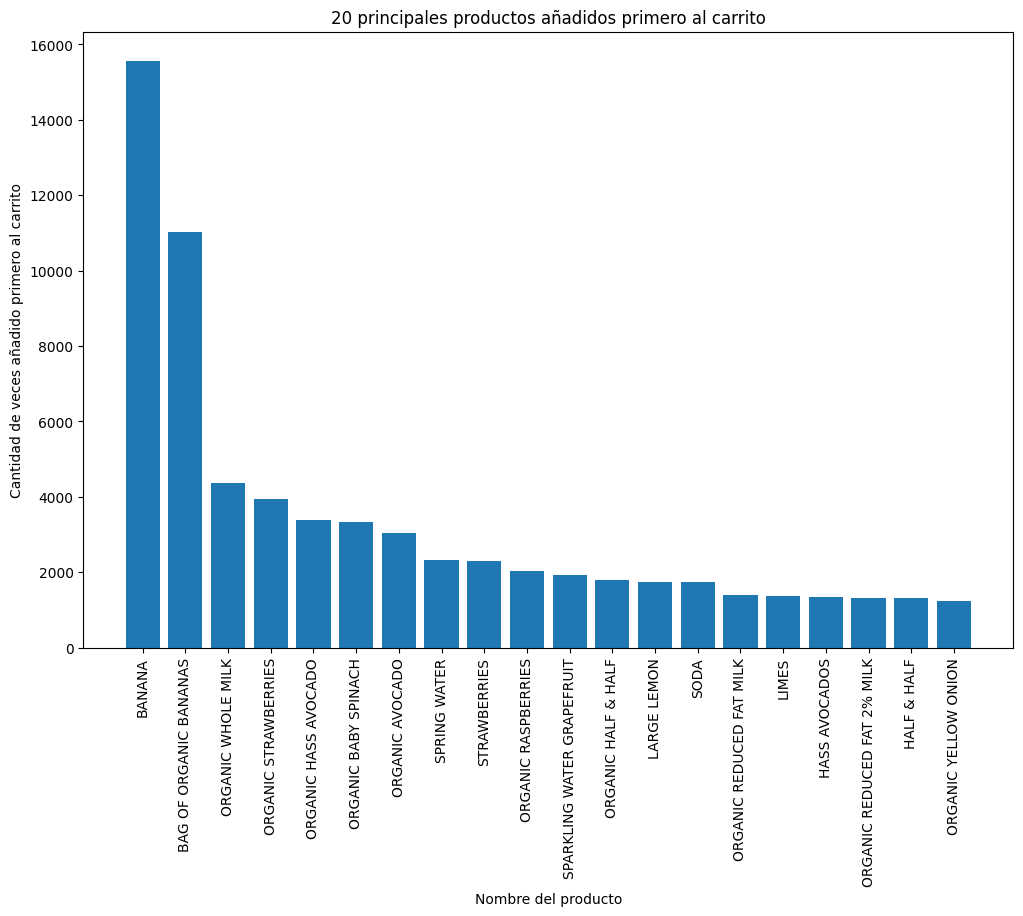

In [46]:
first_added_products = order_products[order_products['add_to_cart_order'] == 1]

top_first_added_products = first_added_products['product_id'].value_counts().head(20)

top_first_added_df = top_first_added_products.reset_index()
top_first_added_df.columns = ['product_id', 'count']

top_first_added_df = top_first_added_df.merge(products[['product_id', 'product_name']],
                                              on='product_id',
                                              how='left')

print(top_first_added_df[['product_id', 'product_name']])
print()
plt.figure(figsize=(12, 8))
plt.bar(top_first_added_df['product_name'], top_first_added_df['count'])
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de veces añadido primero al carrito')
plt.title('20 principales productos añadidos primero al carrito')
plt.xticks(rotation=90)
plt.show()

Escribe aquí tus conclusiones

### Conclusion general del proyecto:

El análisis revela patrones claros en el comportamiento de los clientes de Instacart. La mayoría de los pedidos se concentran en determinados días y horarios, y los clientes tienden a repetir productos esenciales en cada compra. La información obtenida puede ser útil para la optimización de inventarios, estrategias de marketing y personalización de la experiencia del usuario en la plataforma.

Los patrones de compra según la información nos indican que la mayoría de los pedidos se realizan entre las 10 y 16 horas, con un pico alrededor del mediodía y los días con mayor volumen de pedidos son domingo y lunes, por lo que podemos decir que los clientes tienen tendencia a realizar las compras con mayor frecuencia al inicio de la semana.

También el tiempo de espera entre pedidos varía, pero la mayoría de los clientes realizan un nuevo pedido entre 8 y 30 días después del anterior.

En la comparación entre los días miércoles y sábado vemos que los sábados tienden a tener un volumen de compras mayor ligeramente hablando.

Al analizar los primeros productos añadidos al carrito, se encontró que los bananos, la leche y el agua son de los más frecuentes en la primera posición, lo que sugiere que son productos esenciales para los clientes.
